In [ ]:
from __future__ import annotations

import collections
import time

from game.convex import grid
from game.players import heuristics
from matplotlib import pyplot as plt


def play(gri : grid.Grid) -> list[str]:
    h = [
        heuristics.Heuristic("0", gri, 0, 3),
        heuristics.Heuristic("0", gri, 0, 3),
        heuristics.Heuristic("0", gri, 0, 3),
        heuristics.Heuristic("0", gri, 0, 3),
    ]

    while all(not heur.busted for heur in h):
        for heur in h:
            heur.play()

        # _ = g.to_image().show()

    return [heur.id for heur in h if heur.busted]

def do(n : int) -> None:
    start = time.time()
    worst_time = 0
    best: grid.Grid = grid.Grid([])
    worst: grid.Grid | None = None
    nb_played = []

    for i in range(n):
        
        # print progress every 10%
        if i % (n // 10) == 0 and i != 0:
            print(f"{i / n * 100}%")
        
        gr = grid.Grid([
            #very smoll
            # (1, 0), (0, 1), (0, 2), (2, 0)
            
            # small circle
            # (1, 0),(1, 1),(2, 1),(-1, 1),(-2, 1),(0, 1),(1, 2),(-1, 2),

            #small circle v2
            # (1, 0), (0, 1), (2, 0), (2, 1), (1, 2), (0, 2), (-2, 1), (-1, 2),

            # square
            #(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
            #(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),

            # big circle
            #(1, 0), (1, 1), (2, 1), (-1, 1), (-2, 1), (0, 1),
            #(1, 2), (-1, 2), (1, 3), (-1, 3), (3, 1), (-3, 1),
            
            # 14 circle
            (1, 0), (0, 1), (2, 0), (2, 0), (0, 2), (0, 2), (-1, 1), (1, 1), (-1, 1), (1, 1), (-1, 1), (1, 1), (-1, 1), (1, 1),

            # big circle v2
            #(1, 0), (0, 1), (0, 2), (0, 2), (2, 0), (2, 0), (2, 1), (-2, 1), (1, 1), (-1, 1),
            #(1, 1), (-1, 1), (1, 1), (-1, 1), (1, 2), (-1, 2),
        ])

        t1 = time.time()

        play(gr)

        t2 = time.time()

        if t2 - t1 > worst_time:
            worst_time = t2 - t1

        nb_played.append(len(gr.played))

        if best is None or len(best.played) < len(gr.played):
            best = gr

        if worst is None or len(worst.played) > len(gr.played):
            worst = gr

    stop = time.time()

    print(f"Time per board: {(stop - start) / n * 1000}ms")  # noqa: T201 - using in ipynb
    print(f"Worst time: {worst_time * 1000}ms")  # noqa: T201 - using in ipynb

    col = collections.Counter(nb_played)
    plt.bar(list(col.keys()), list(col.values()))

    for i, v in col.items():
        plt.text(i, v, str(v))

    plt.show()

    _ = best.to_image()  # using _ =  to prevent displaying the image twice

    if worst is not None:
        _ = worst.to_image()  # using _ =  to prevent displaying the image twice

do(int(5 * 1e5))

10.0%
20.0%
30.0%


Time per board: 49.99109745025635ms
Worst time: 1659.8331928253174ms


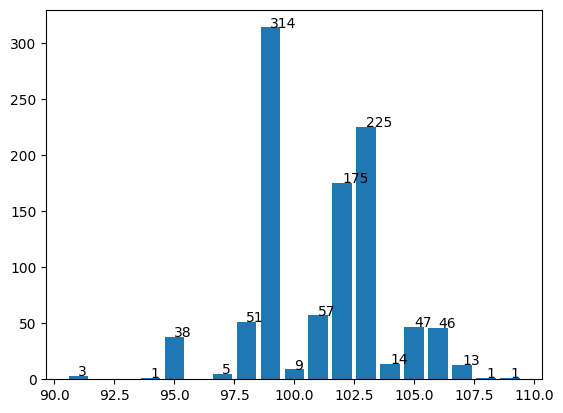

         339724564 function calls (339709134 primitive calls) in 49.294 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   49.294   49.294 {built-in method builtins.exec}
        1    0.000    0.000   49.294   49.294 <string>:1(<module>)
        1    0.011    0.011   49.294   49.294 2812950403.py:29(do)
     1000    0.062    0.000   48.044    0.048 2812950403.py:11(play)
   102668    0.299    0.000   47.889    0.000 player.py:75(play)
   102668    0.046    0.000   39.559    0.000 heuristics.py:151(_choose)
   102668    4.753    0.000   39.513    0.000 heuristics.py:33(_choice_one)
 11228293    5.863    0.000   33.340    0.000 {built-in method builtins.sum}
101928962   20.790    0.000   27.475    0.000 heuristics.py:45(<genexpr>)
   102668    1.368    0.000    7.915    0.000 player.py:53(_add_new_pos)
181409163    6.686    0.000    6.686    0.000 {built-in method builtins.abs}
  2409512    0.418 

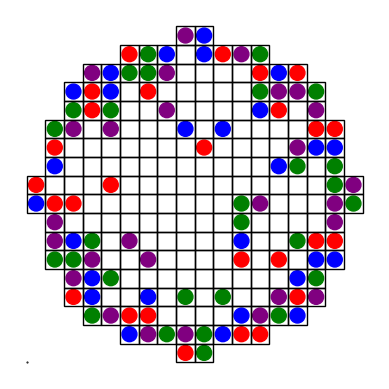

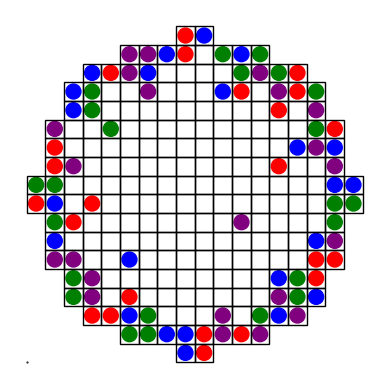

In [6]:
import cProfile

cProfile.run("do(int(1e3))", sort="cumtime")

68
{(4, 0), (3, 4), (4, 3), (3, 1), (3, 7), (4, 9), (5, 4), (4, 6), (5, 1), (5, 7), (9, 5), (8, 3), (8, 6), (0, 5), (2, 2), (1, 6), (2, 5), (1, 3), (2, 8), (7, 4), (6, 2), (7, 1), (7, 7), (6, 5), (6, 8), (4, 2), (4, 5), (3, 3), (5, 0), (5, 6), (4, 8), (3, 6), (5, 3), (5, 9), (8, 2), (8, 5), (9, 4), (2, 4), (1, 2), (0, 4), (2, 1), (2, 7), (1, 5), (6, 1), (6, 4), (7, 3), (6, 7), (7, 6), (3, 2), (4, 1), (4, 7), (3, 5), (5, 2), (4, 4), (3, 8), (5, 5), (8, 4), (5, 8), (8, 7), (1, 4), (2, 3), (1, 7), (2, 6), (7, 2), (6, 6), (7, 5), (6, 3), (7, 8)}


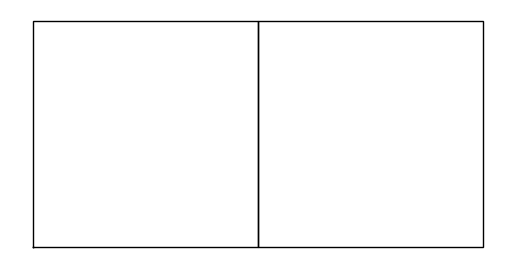

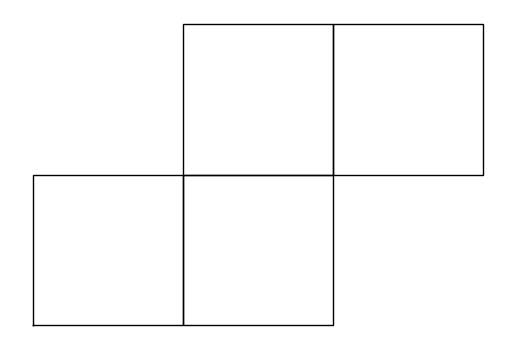

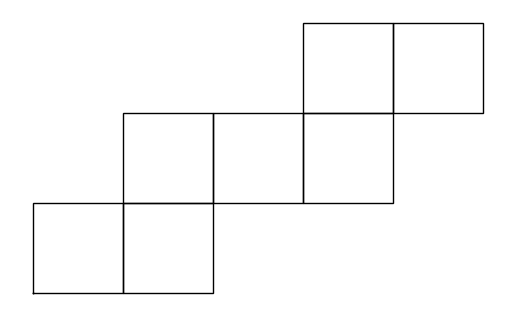

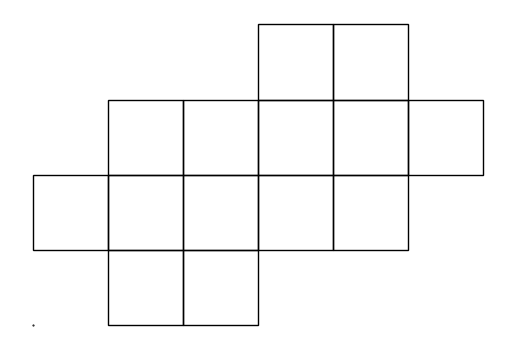

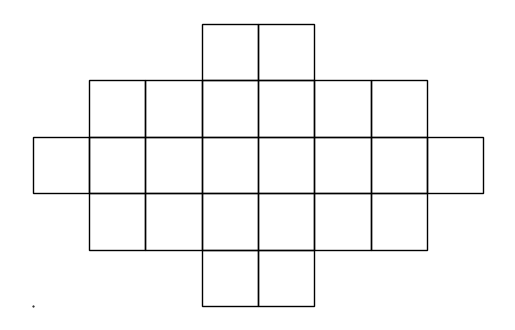

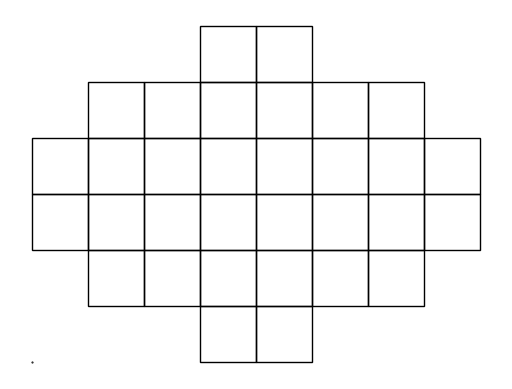

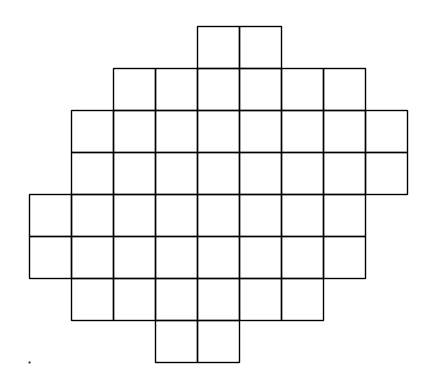

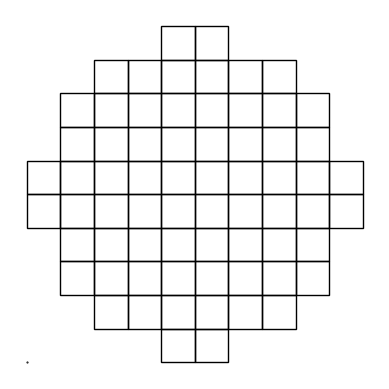

In [10]:
from game.convex import grid  # noqa: F811

instructions = [
    (1, 0),(1, 1),(2, 1),(-1, 1),(-2, 1),(0, 1),(1, 2),(-1, 2),
]
grid_step = None

for i in range(1, len(instructions) + 1):
    grid_step = grid.Grid(instructions[:i])

    _ = grid_step.to_image()  # using _ =  to prevent displaying the image twice

if grid_step is not None:
    print(len(grid_step.board))
    print(grid_step.board)